# Numpy Arrays

We'll import the `numpy` module using the short form `np` to save us typing. 

In [1]:
import numpy as np # imports a fast numerical programming library

## Starting up with numpy arrays

Scientific Python code uses a fast array structure, called the numpy array. Those who have worked in Matlab will find this very natural.   For reference, the numpy documention can be found [here](https://docs.scipy.org/doc/numpy/reference/).  

Let's make a numpy array.

In [2]:
my_array = np.array([1, 2, 3, 4])
my_array

array([1, 2, 3, 4])

Numpy arrays are listy! Below we compute length, slice, and iterate. 

In [3]:
print(len(my_array))
print(my_array[2:4])
for ele in my_array:
    print(ele)

4
[3 4]
1
2
3
4


**In general you should manipulate numpy arrays by using numpy module functions** (`np.mean`, for example). This is for efficiency purposes, and a discussion follows below this section.

You can calculate the mean of the array elements either by calling the method `.mean` on a numpy array or by applying the function np.mean with the numpy array as an argument.

In [4]:
print(my_array.mean())
print(np.mean(my_array))

2.5
2.5


The way we constructed the numpy array above seems redundant..after all we already had a regular python list. Indeed, it is the other ways we have to construct numpy arrays that make them super useful. 

There are many such numpy array *constructors*. Here are some commonly used constructors. Look them up in the documentation.

In [5]:
np.ones(10) # generates 10 floating point ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Numpy gains a lot of its efficiency from being typed. That is, all elements in the array have the same type, such as integer or floating point. The default type, as can be seen above, is a float of size appropriate for the machine (64 bit on a 64 bit machine).

In [6]:
np.dtype(float).itemsize # in bytes

8

In [7]:
np.ones(10, dtype='int') # generates 10 integer ones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
np.random.rand(5)

array([0.13975304, 0.72550434, 0.63878118, 0.40184584, 0.11325375])

In [11]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [13]:
np.eye(3) @ np.array([1,2,3])

array([1., 2., 3.])

In [16]:
np.eye(3).shape, np.array([1,2,3]).shape

((3, 3), (3,))

## Numpy supports vector operations

What does this mean? It means that instead of adding two arrays, element by element, you can just say: add the two arrays. Note that this behavior is very different from python lists.

In [17]:
first = np.ones(5)
second = np.ones(5)
first + second

array([2., 2., 2., 2., 2.])

In [18]:
first_list = [1., 1., 1., 1., 1.]
second_list = [1., 1., 1., 1., 1.]
first_list + second_list #not what u want

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

On some computer chips this addition actually happens in parallel, so speedups can be high. But even on regular chips, the advantage of greater readability is important.

Numpy supports a concept known as *broadcasting*, which dictates how arrays of different sizes are combined together. There are too many rules to list here, but importantly, multiplying an array by a number multiplies each element by the number. Adding a number adds the number to each element.

In [19]:
first + 1 # 1. 1. 1. 1. 1. + 1 1 1 1 1

array([2., 2., 2., 2., 2.])

In [20]:
first*5

array([5., 5., 5., 5., 5.])

### 2D arrays
Similarly, we can create two-dimensional arrays.

In [21]:
my_array2d = np.array([ [1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12] ])
my_array2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [22]:
my_array2d.shape

(3, 4)

In [23]:
# 3 x 4 array of ones
ones_2d = np.ones([3, 4])
ones_2d

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

Like lists, numpy arrays are 0-indexed.  Thus we can access the $n$th row and the $m$th column of a two-dimensional array with the indices $[n - 1, m - 1]$.

In [24]:
print(my_array2d)
my_array2d[2, 3]

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


12

The 2D arrays are listy as well. They have set length (array dimensions), can be sliced, and can be iterated over with loop.  Below is a schematic illustrating slicing two-dimensional arrays.  

 <img src="images/2dindex_v2.png" alt="Drawing" style="width: 500px;"/>

In two dimensions, we need to provide the **shape** of the array, ie, the number of rows and columns of the array.

In [25]:
onesarray = np.ones([3,4])
onesarray

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [26]:

onesarray.shape

(3, 4)

Numpy functions will by default work on the entire array:

In [27]:
np.sum(onesarray)

12.0

The axis 0 is the one going downwards (the $y$-axis, so to speak), whereas axis 1 is the one going across (the $x$-axis). You will often use functions such as `mean`, `sum`, with an axis.

In [28]:
np.sum(onesarray, axis=0)

array([3., 3., 3., 3.])

In [29]:
np.sum(my_array2d, axis=0)

array([15, 18, 21, 24])

In [30]:
np.sum(onesarray, axis=1)

array([4., 4., 4.])

In [34]:
import pandas as pd
test_data = pd.read_csv("/Users/leewoojin/Downloads/MNIST_CSV/mnist_test.csv", header=None)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
first_number = test_data.iloc[0].values

In [41]:
first_number.shape

(785,)

In [44]:
first_number = first_number[1:]

In [45]:
first_number.shape

(784,)

In [47]:
first_image = first_number.reshape(28, 28)

In [48]:
first_image.shape

(28, 28)

In [49]:
first_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [50]:
import matplotlib

In [51]:
import matplotlib.pyplot as plt

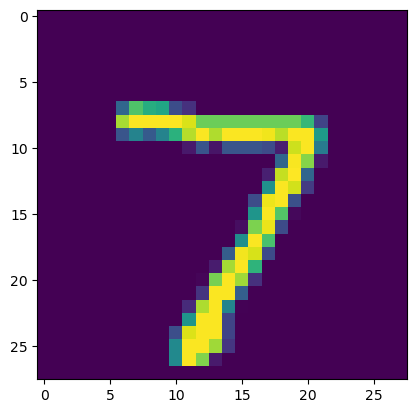

In [52]:
plt.imshow(first_image)

In [53]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
labels = test_data[0].copy().values

In [59]:
labels

array([7, 2, 1, ..., 4, 5, 6])

In [61]:
test_images_df = test_data.drop(0, axis = 1)
test_images_df.shape

(10000, 784)

In [62]:
test_images = test_images_df.values

In [63]:
test_images.shape

(10000, 784)

In [64]:
test_images_tensor = test_images.reshape(-1, 28, 28)
test_images_tensor.shape

(10000, 28, 28)

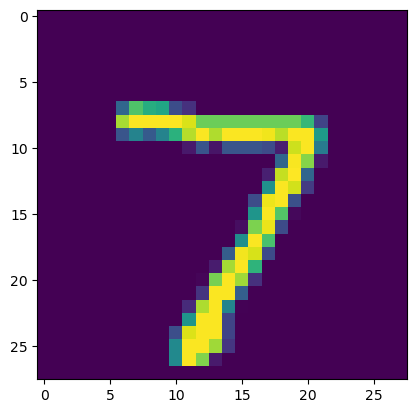

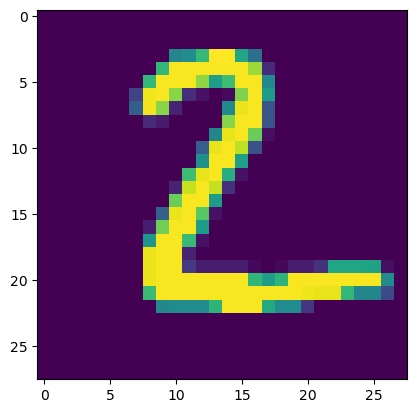

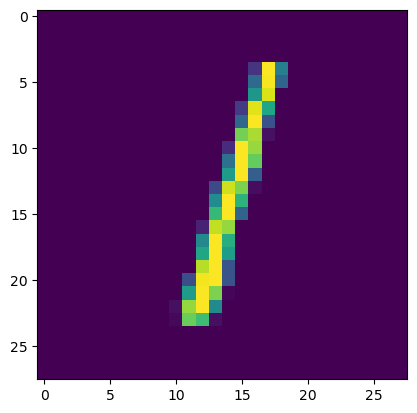

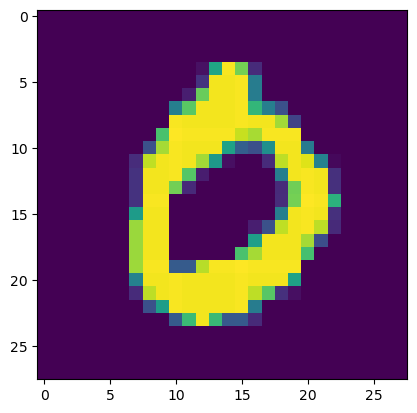

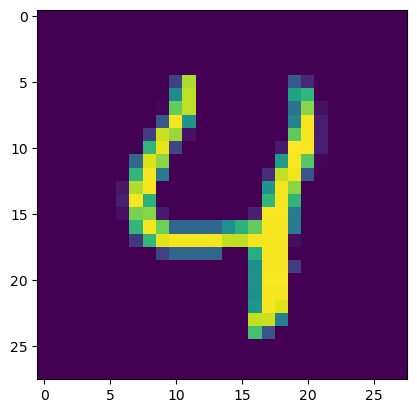

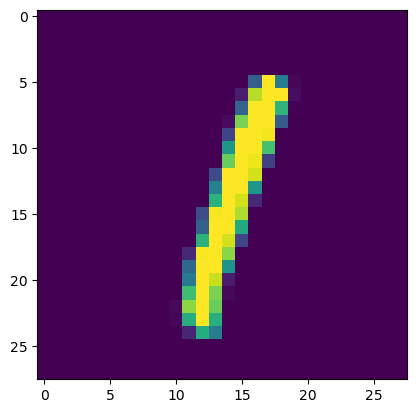

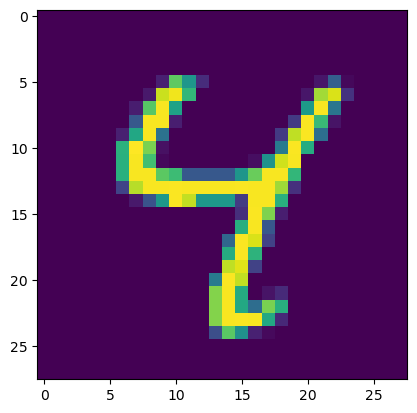

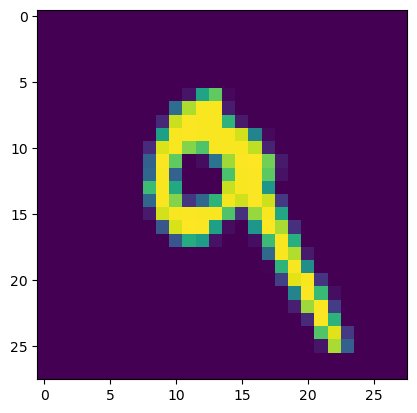

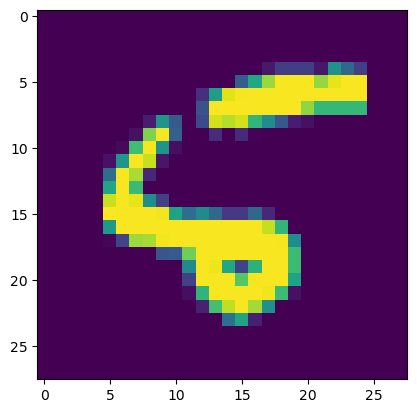

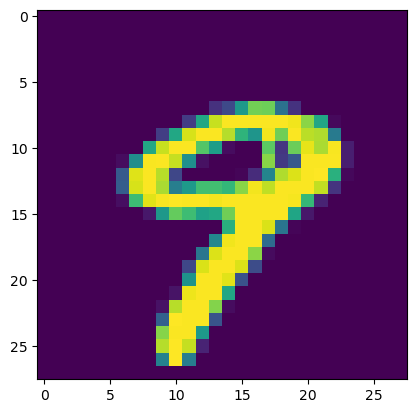

In [66]:
for i in range(10):
    plt.figure()
    plt.imshow(test_images_tensor[i])

In [46]:
# !head -10 /Users/leewoojin/Downloads/MNIST_CSV/mnist_test.csv

You should notice that access is row-by-row and one dimensional iteration gives a row. This is because `numpy` lays out memory row-wise.

![](images/2d-array-layout.png)

(from https://aaronbloomfield.github.io)

An often seen idiom allocates a two-dimensional array, and then fills in one-dimensional arrays from some function:

## Numpy Arrays vs. Python Lists?

1. Why the need for numpy arrays?  Can't we just use Python lists?
2. Iterating over numpy arrays is slow. Slicing is faster

Last time we said that Python lists may contain items of different types. This flexibility comes at a price: Python lists store *pointers* to memory locations.  On the other hand, numpy arrays are typed, where the default type is floating point.  Because of this, the system knows how much memory to allocate, and if you ask for an array of size 100, it will allocate one hundred contiguous spots in memory, where the size of each spot is based on the type.  This makes access extremely fast.

![](images/array_vs_list.png)

(from the book below)

BUT, iteration slows things down again. In general you should not access numpy array elements by iteration.  This is because of type conversion.  Numpy stores integers and floating points in C-language format.  When you operate on array elements through iteration, Python needs to convert that element to a Python int or float, which is a more complex beast (a `struct` in C jargon).  This has a cost.

![](images/cint_vs_pyint.png)

(from the book below)

If you want to know more, we will suggest that you read [this]() from [Jake Vanderplas's Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). You will find that book an incredible resource for this class.

Why is slicing faster? The reason is technical: slicing provides a view onto the memory occupied by a numpy array, instead of creating a new array. That is the reason the code above this cell works nicely as well. However, if you iterate over a slice, then you have gone back to the slow access.

By contrast, functions such as `np.dot` are implemented at C-level, do not do this type conversion, and access contiguous memory. If you want this kind of access in Python, use the struct module or Cython. Indeed many fast algorithms in numpy, pandas, and C are either implemented at the C-level, or employ Cython.

*Try implementing dot product for both numpy arrays and python lists yourself, and compare to `np.dot`. Use `%timeit` for timing. Use arrays large enough to make a difference but they must fit well within your systems memory so you dont swap.*

For more practice exercises (with solutions) and discussion, see this [page](http://www.practicepython.org).  Some of these exercises are particularly relevant.  Check them out!

Don't forget to look up [Jake's book](https://jakevdp.github.io/PythonDataScienceHandbook/).

Finally, we would like to suggest using [Chris Albon's web site](https://chrisalbon.com) as a reference. Lots of useful information there.